In [1]:
sc

<SparkContext master=spark://bhg0020:7077 appName=jupyter>

In [2]:
sc.getConf().getAll()

[(u'spark.rdd.compress', u'True'),
 (u'spark.local.dir', u'/local_scratch/4615954'),
 (u'spark.serializer.objectStreamReset', u'100'),
 (u'spark.executor.memory', u'20480M'),
 (u'spark.driver.host', u'bhg0020.bluehive.circ.private'),
 (u'spark.driver.port', u'43530'),
 (u'spark.executor.id', u'driver'),
 (u'spark.submit.deployMode', u'client'),
 (u'spark.app.id', u'app-20180504120907-0001'),
 (u'spark.master', u'spark://bhg0020:7077'),
 (u'spark.ui.showConsoleProgress', u'true'),
 (u'spark.app.name', u'jupyter')]

In [3]:
book=sc.textFile('/public/tbiswas2/csc261/spark/bronte-jane-eyre.txt')
type(book)

pyspark.rdd.RDD

# Q1

In [4]:
words=book.flatMap(lambda x: x.split())
#words.take(10)

In [5]:
import re
words_lower=words.map(lambda x: re.sub(r'[^\w]','',x.lower()))
#words_lower.take(10)

In [6]:
counts=words_lower.flatMap(lambda x:[(c,1) for c in x]).reduceByKey(lambda v1, v2: v1+v2)

In [7]:
numbers = set(['0','1','2','3','4','5','6','7','8','9'])
filteredCount=counts.filter(lambda x : x[0] not in numbers)

In [8]:
type(filteredCount)

pyspark.rdd.PipelinedRDD

In [9]:
dic = filteredCount.collectAsMap()

In [10]:
x = []
y = []
for i in dic.keys():
    x.append(str(i))
    y.append(int(dic[i]))

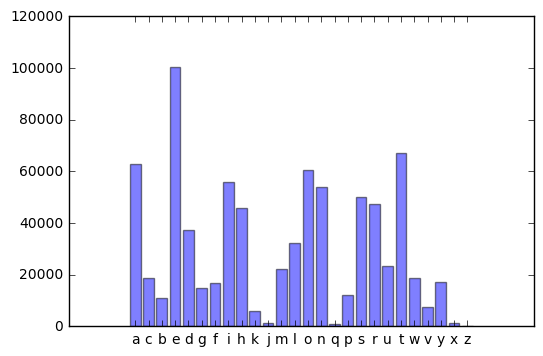

In [12]:
import matplotlib.pyplot as plt
import numpy as np
a =  np.arange(len(x))
plt.bar(a, y, align='center', alpha=0.5)
plt.xticks(a, x)
plt.show()

# Q2

In [13]:
temp = words_lower.distinct()
#space = set([' '])
#filteredCount=temp.filter(lambda x : x not in space)
#temp.take(10)

In [14]:
ana = temp.map(lambda x: (''.join(sorted(list(x))),x))
ana.take(10)

[(u'afnw', u'fawn'),
 ('', u''),
 (u'aehlpsst', u'pathless'),
 (u'ddeeenp', u'deepden'),
 (u'ellowy', u'yellow'),
 (u'foru', u'four'),
 (u'egilnrst', u'ringlets'),
 (u'giklnoo', u'looking'),
 (u'cdlos', u'scold'),
 (u'agiiilnorty', u'originality')]

In [15]:
new_ana = ana.reduceByKey(lambda v1, v2: (v1,v2))
new_ana = new_ana.filter(lambda x: type(x[1]) == tuple)
new_ana = new_ana.sortByKey(ascending= True)
new_ana = new_ana.map(lambda x:(x[0],set(x[1])))

In [16]:
new_ana.take(3)

[(u'aadeemqrsu', {u'masquerade', u'squaremade'}),
 (u'aadins', {u'dianas', u'naiads'}),
 (u'aaginnostt', {u'antagonist', u'stagnation'})]

In [16]:
lines = book.zipWithIndex()
lines.take(3)

[(u'                                      1846', 0),
 (u'', 1),
 (u'                                   JANE EYRE', 2)]

In [14]:
empty = lines.filter(lambda x: len(x[0]) == 0)

In [15]:
empty.take(5)

[(u'', 1), (u'', 3), (u'', 5), (u'', 7), (u'', 9)]

# Q3

In [17]:
lines = book.zipWithIndex()

In [64]:
def search(text):
    result = set()
    words = text[0].split()
    position = 0
    new = text[0]
    for i in words:
        result.add((i, (text[1]+1, new.find(i) + position + 1)))
        position += (new.find(i) + len(i))
        new = new[new.find(i) + len(i):]
    return result

In [65]:
new_lines = lines.flatMap(search)

In [66]:
new_lines.take(5)
check = 'Rochester'
result = new_lines.filter(lambda x: x[0].startswith(check))
result.take(10)

[(u'Rochester', (4504, 34)),
 (u"Rochester!'", (4509, 9)),
 (u"Rochester?'", (4512, 15)),
 (u'Rochesters', (4522, 1)),
 (u"Rochester's", (4524, 57)),
 (u"Rochester's", (4532, 16)),
 (u'Rochester', (4580, 1)),
 (u'Rochester.', (4584, 51)),
 (u'Rochester', (4585, 1)),
 (u'Rochester', (4594, 27))]